# Data 4319: HW 2
## Chiagozie Uwalaka

### Part 1 

(a) Notice that we used 100 epochs which was waste of time and we could have stopped earlier since after about epoch 55 or so, the loss is not getting lower significantly. Modify the above code so that if the change in loss is less than $1\%$, you exit the iterations. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("iris_dataset.csv")
df.head()
df = df.iloc[:50][["sepal_length", "sepal_width"]]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [2]:
class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression.

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias.
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration
        of batch gradient descent.

    Methods
    -------
    fit(self, X, y, alpha=0.001, epochs=10)
        Iterates the batch gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data
        consists of the feature vector X and the associated target y.

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the
        activation_function to make a prediction on each data instance.
    """

    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha=0.001, epochs=10, convergence_threshold=0.01):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []  # keep track of errors
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            # iterations going into the dataset
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi) * xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi) ** 2)  # calculate errors
            # update coefficients and errors after each iteration
            self.theta[:-1] -= 2 * alpha * sum_1 / n
            self.theta[-1] -= 2 * alpha * sum_2 / n
            self.errors.append(errors / n)

            
            if len(self.errors) > 1 and (self.errors[-2] - self.errors[-1]) / self.errors[-2] < convergence_threshold:
                print(f"Converged after {_} iterations.")
                break

        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)


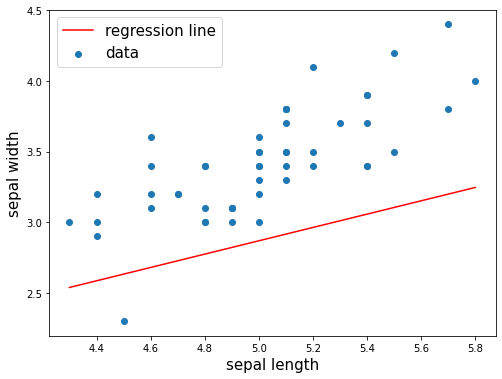

In [3]:
X = df[['sepal_length']].to_numpy()
y = df['sepal_width'].to_numpy()
def identity_function(z):
    return z
model = MyLinReg(identity_function)
model.fit(X, y)
model.predict(X)
domain_x = np.linspace(np.min(X), np.max(X), 5)
domain_y = model.predict(domain_x.reshape(-1,1))

plt.figure(figsize = (8, 6))

plt.scatter(X, y, label = "data")
plt.plot(domain_x, domain_y, color="red", label ="regression line")
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15)
plt.legend(fontsize=15);

Part 2:
Try using sklearn SGDRegressor class instead of sklearn LinearRegression.

If the input variables are of different scales (here, TV and radio), scaling those variables improves SGD convergence. Read about sklearn MinMaxScaler and try to see if using it will give better results.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
import seaborn as sns

ads_data = pd.read_csv("advertising_dataset.csv")

In [5]:
ads_data = ads_data[["TV", "radio", "newspaper", "sales"]]
ads_data.head()

X = ads_data[['TV', 'radio']]
y = ads_data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = SGDRegressor()

reg.fit(X_train, y_train)

SGDRegressor()

In [6]:
w = reg.coef_
b = reg.intercept_

w, b

print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -217427492117.591 * TV + -800367247.753 * radio + [-2.51290203e+10]


In [7]:
mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 38595910430632.38

RMSE on the test data: 33112936293277.83


In [8]:
from sklearn.preprocessing import MinMaxScaler
reg = SGDRegressor()
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
reg.fit(X_train_scaled, y_train)
X_test_scaled = scaler.fit_transform(X_test)

w = reg.coef_
b = reg.intercept_

w, b

print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = 11.906 * TV + 9.318 * radio + [3.864]


In [9]:
mse_train = mean_squared_error(y_train, reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, reg.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 1.6300494276397524

RMSE on the test data: 1.9321350261977346


Part 3:
Import the data file mtcars.csv. The goal is to determine two or three continuous numerical variables that can be used to predict mpg (miles per gallon) using multiple linear regression. You can use sklearn or custom class; batch GD, SGD, or mini-batch SGD; and scaling.

In [12]:
cars_df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

cars_df = pd.read_csv("mtcars.csv")

features = cars_df[["hp", "wt"]]
target = cars_df["mpg"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, train_size=0.7, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

w = model.coef_
b = model.intercept_

w, b

(array([-2.3538495 , -3.66185116]), 19.73202050282004)

In [20]:
print(f"The linear regression model based on the training data is \n")
print(f"mpg = {np.round(w[0],3)} * hp + {np.round(w[1],3)} * wt + {np.round(b,3)}")

The linear regression model based on the training data is 

mpg = -2.354 * hp + -3.662 * wt + 19.732
